In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
path = pd.read_excel("dataset_talento_tech.xlsx")

In [3]:
df = path
df.head()

,ID,ID_DEPARIMPO,ID_NANDINA,ID_NITIMPOR,ID_PAISCOMPRA,ID_PAISORIGEN,COD_ADUANA,VIA_TRANSP,ANNIO_PRESENTA,MES_PRESENTA,...,FLETES,CIFDO,FECHAMANIFIESTO,NUMMANIFIESTO,NUMLICENCIA,ANNOLICENCIA,principio activo,fabricante,precio,marca
0,16924681,18,3333,87198,88,65,35,1,2019,1,...,1514.68,21433.48,20190116,575009648417,50054942,2019,acetico acido,oci intern,0.000,acido acetico glacial
1,16924937,34,3171,1259,116,116,35,1,2019,1,...,1316.87,13046.87,20190113,575009635686,50032106,2018,sorbitol,kasyap sweetners,0.560,listerine cool mint
2,16925468,3,3699,87705,74,74,35,1,2019,1,...,2230.11,30742.11,20190115,575009639030,50002180,2018,l-lisina hcl,sino star chemicals,1.198,NaN
3,16925869,8,4175,204523,74,74,35,1,2019,1,...,272.50,12400.00,20190120,575009660220,50044573,2018,c ascorbico acido,yixing jiangshan biotech,4.960,NaN
4,16925878,8,4170,204523,74,74,35,1,2019,1,...,25.61,8180.00,20190120,575009660220,50044573,2018,b1 tiamina hcl,jiangxi tianxin pharma,40.900,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29082 entries, 0 to 29081
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                29082 non-null  int64  
 1   ID_DEPARIMPO      29082 non-null  int64  
 2   ID_NANDINA        29082 non-null  int64  
 3   ID_NITIMPOR       29082 non-null  int64  
 4   ID_PAISCOMPRA     29082 non-null  int64  
 5   ID_PAISORIGEN     29082 non-null  int64  
 6   COD_ADUANA        29082 non-null  int64  
 7   VIA_TRANSP        29082 non-null  int64  
 8   ANNIO_PRESENTA    29082 non-null  int64  
 9   MES_PRESENTA      29082 non-null  int64  
 10  FECHA_PRESENTA    29082 non-null  int64  
 11  NANDINA           29082 non-null  int64  
 12  DESCRIPCIONMERCA  29082 non-null  object 
 13  NUM_PREIMP        29082 non-null  int64  
 14  NUM_ACEPTACION    29082 non-null  int64  
 15  NITDECLARANTE     29082 non-null  int64  
 16  NITIMPOR          29082 non-null  int64 

In [30]:
nulos = df.isnull().sum()
nulos

ID                      0
ID_DEPARIMPO            0
ID_NANDINA              0
ID_NITIMPOR             0
ID_PAISCOMPRA           0
ID_PAISORIGEN           0
COD_ADUANA              0
VIA_TRANSP              0
ANNIO_PRESENTA          0
MES_PRESENTA            0
FECHA_PRESENTA          0
NANDINA                 0
DESCRIPCIONMERCA        0
NUM_PREIMP              0
NUM_ACEPTACION          0
NITDECLARANTE           0
NITIMPOR                0
RAZONIMPOR              0
EXPORTADOR              0
CIUPAISEXPOR            0
PAISPROC                0
PAISORIGEN              0
PAISCOMPRA              0
CANTIDAD                0
CODUNIDAD               0
KILOSNETO               0
KILOSBRUTO              0
FOBDO                   0
FLETES                  0
CIFDO                   0
FECHAMANIFIESTO         0
NUMMANIFIESTO           0
NUMLICENCIA             0
ANNOLICENCIA            0
principio activo        0
fabricante           8355
precio                  0
marca               11446
dtype: int64

## Tratamiento de datos nulos

Reemplazar precios 0 por NaN

In [31]:
df['precio'] = df['precio'].replace(0, np.nan)

print(f"Precios reemplazados por NaN: {df['precio'].isna().sum()}")

Precios reemplazados por NaN: 9375


Mostrar resumen de valores nulos por columna relevante

In [32]:
columnas_clave = ['principio activo', 'fabricante', 'marca', 'precio']
print("\n Valores nulos por columna:")
print(df[columnas_clave].isnull().sum())


 Valores nulos por columna:
principio activo        0
fabricante           8355
marca               11446
precio               9375
dtype: int64


Normalizar texto para evitar duplicados por mayúsculas y minúsculas

In [33]:
for col in ['principio activo', 'fabricante', 'marca']:
    df[col] = df[col].astype(str).str.strip().str.lower().replace({'nan': np.nan})

def imputar_por_moda(grupo, columna):
    moda = grupo[columna].mode()
    if not moda.empty:
        grupo[columna] = grupo[columna].fillna(moda[0])
    return grupo

for col in ['fabricante', 'marca']:
    df = df.groupby('principio activo', group_keys=False).apply(imputar_por_moda, columna=col)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9556\3542518089.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('principio activo', group_keys=False).apply(imputar_por_moda, columna=col)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9556\3542518089.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('principio activo', group_keys=False).apply(imputar_por_moda, columna=col)


Imputacion de principio activo

In [34]:
mask_null = df['principio activo'].isnull()
if mask_null.sum() > 0:
    ref = df.dropna(subset=['principio activo'])
    for i, row in df[mask_null].iterrows():
        coincidencia = ref[
            (ref['fabricante'] == row['fabricante']) &
            (ref['marca'] == row['marca'])
        ]
        if not coincidencia.empty:
            df.at[i, 'principio activo'] = coincidencia['principio activo'].mode()[0]

Imputacion de precios faltantes <br>
Relleno de precios nulos con la mediana del mismo principio activo

In [35]:
df['precio'] = df.groupby('principio activo')['precio'].transform(lambda x: x.fillna(x.median()))

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis

Validación del tratamiento de datos

In [36]:
print("\n Nulos después de la imputación:")
print(df[columnas_clave].isnull().sum())


 Nulos después de la imputación:
principio activo       0
fabricante          4996
marca               5809
precio              5464
dtype: int64


Predecir el fabricante y marca faltante con sklearn

In [37]:
le_fabricante = LabelEncoder()
df['fabricante_encoded'] = le_fabricante.fit_transform(df['fabricante'].astype(str))

train = df.dropna(subset=['fabricante'])
test = df[df['fabricante'].isna()]

X_train = train[['precio']]
y_train = le_fabricante.transform(train['fabricante'])

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

df.loc[df['fabricante'].isna(), 'fabricante'] = le_fabricante.inverse_transform(
    model.predict(test[['precio']])
)
print("\n Nulos después de la imputación:")
print(df[columnas_clave].isnull().sum())


 Nulos después de la imputación:
principio activo       0
fabricante             0
marca               5809
precio              5464
dtype: int64


In [38]:
def imputar_marca(grupo):
    moda = grupo['marca'].mode()
    if not moda.empty:
        grupo['marca'] = grupo['marca'].fillna(moda[0])
    return grupo

df = df.groupby(['fabricante', 'principio activo'], group_keys=False).apply(imputar_marca)

df['marca'] = df.groupby('fabricante')['marca'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
 
if df['marca'].isna().sum() > 0:
    moda_global = df['marca'].mode()[0]
    df['marca'] = df['marca'].fillna(moda_global)

print("\n Nulos después de la imputación:")
print(df[columnas_clave].isnull().sum())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9556\785824545.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['fabricante', 'principio activo'], group_keys=False).apply(imputar_marca)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9556\785824545.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['marca'] = df.groupby('fabricante')['marca'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))



 Nulos después de la imputación:
principio activo       0
fabricante             0
marca                  0
precio              5464
dtype: int64


In [39]:
df_modelo = df.copy()

le_fabricante = LabelEncoder()
le_marca = LabelEncoder()
le_principio = LabelEncoder()

df_modelo['fabricante_enc'] = le_fabricante.fit_transform(df_modelo['fabricante'].astype(str))
df_modelo['marca_enc'] = le_marca.fit_transform(df_modelo['marca'].astype(str))
df_modelo['principio_enc'] = le_principio.fit_transform(df_modelo['principio activo'].astype(str))

train = df_modelo.dropna(subset=['precio'])  
test = df_modelo[df_modelo['precio'].isna()]  

features = ['fabricante_enc', 'marca_enc', 'principio_enc']

X_train = train[features]
y_train = train['precio']
X_test = test[features]

modelo_precio = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=12
)
modelo_precio.fit(X_train, y_train)

predicciones = modelo_precio.predict(X_test)

df.loc[df['precio'].isna(), 'precio'] = predicciones

df.to_csv("datos_farmaceutica_limpios.csv", index=False)
print("\n Archivo guardado como 'datos_farmaceutica_limpios.csv'")


 Archivo guardado como 'datos_farmaceutica_limpios.csv'


Verificación del tratamiento de datos

In [40]:
print("\n Nulos después de la imputación:")
print(df[columnas_clave].isnull().sum())


 Nulos después de la imputación:
principio activo    0
fabricante          0
marca               0
precio              0
dtype: int64


Importación del dataset transformado

In [41]:
path = pd.read_csv("C:\\Users\\Usuario\\Documents\\Talento Tech\\Proyecto Final\\datos_farmaceutica_limpios.csv")

In [42]:
df_limpio = path
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29082 entries, 0 to 29081
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  29082 non-null  int64  
 1   ID_DEPARIMPO        29082 non-null  int64  
 2   ID_NANDINA          29082 non-null  int64  
 3   ID_NITIMPOR         29082 non-null  int64  
 4   ID_PAISCOMPRA       29082 non-null  int64  
 5   ID_PAISORIGEN       29082 non-null  int64  
 6   COD_ADUANA          29082 non-null  int64  
 7   VIA_TRANSP          29082 non-null  int64  
 8   ANNIO_PRESENTA      29082 non-null  int64  
 9   MES_PRESENTA        29082 non-null  int64  
 10  FECHA_PRESENTA      29082 non-null  int64  
 11  NANDINA             29082 non-null  int64  
 12  DESCRIPCIONMERCA    29082 non-null  object 
 13  NUM_PREIMP          29082 non-null  int64  
 14  NUM_ACEPTACION      29082 non-null  int64  
 15  NITDECLARANTE       29082 non-null  int64  
 16  NITI

In [43]:
nulos = df_limpio.isnull().sum()
nulos

ID                    0
ID_DEPARIMPO          0
ID_NANDINA            0
ID_NITIMPOR           0
ID_PAISCOMPRA         0
ID_PAISORIGEN         0
COD_ADUANA            0
VIA_TRANSP            0
ANNIO_PRESENTA        0
MES_PRESENTA          0
FECHA_PRESENTA        0
NANDINA               0
DESCRIPCIONMERCA      0
NUM_PREIMP            0
NUM_ACEPTACION        0
NITDECLARANTE         0
NITIMPOR              0
RAZONIMPOR            0
EXPORTADOR            0
CIUPAISEXPOR          0
PAISPROC              0
PAISORIGEN            0
PAISCOMPRA            0
CANTIDAD              0
CODUNIDAD             0
KILOSNETO             0
KILOSBRUTO            0
FOBDO                 0
FLETES                0
CIFDO                 0
FECHAMANIFIESTO       0
NUMMANIFIESTO         0
NUMLICENCIA           0
ANNOLICENCIA          0
principio activo      0
fabricante            0
precio                0
marca                 0
fabricante_encoded    0
dtype: int64

Retiro la variable 'ANNIO_PRESENTA'

In [44]:
df_sin_annio = df_limpio.drop(columns=['ANNIO_PRESENTA'])
df_sin_annio

,ID,ID_DEPARIMPO,ID_NANDINA,ID_NITIMPOR,ID_PAISCOMPRA,ID_PAISORIGEN,COD_ADUANA,VIA_TRANSP,MES_PRESENTA,FECHA_PRESENTA,...,CIFDO,FECHAMANIFIESTO,NUMMANIFIESTO,NUMLICENCIA,ANNOLICENCIA,principio activo,fabricante,precio,marca,fabricante_encoded
0,16924681,18,3333,87198,88,65,35,1,1,20190121,...,21433,20190116,575009648417,50054942,2019,acetico acido,oci intern,2,acido acetico glacial,1463
1,16924937,34,3171,1259,116,116,35,1,1,20190121,...,13047,20190113,575009635686,50032106,2018,sorbitol,kasyap sweetners,1,listerine cool mint,1097
2,16925468,3,3699,87705,74,74,35,1,1,20190122,...,30742,20190115,575009639030,50002180,2018,l-lisina hcl,sino star chemicals,1,equiforma,1848
3,16925869,8,4175,204523,74,74,35,1,1,20190122,...,12400,20190120,575009660220,50044573,2018,c ascorbico acido,yixing jiangshan biotech,5,rovimix c-ec,2232
4,16925878,8,4170,204523,74,74,35,1,1,20190122,...,8180,20190120,575009660220,50044573,2018,b1 tiamina hcl,jiangxi tianxin pharma,41,complejo b inj,1049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29077,25775453,8,4769,15188,238,88,3,4,5,20190515,...,39662,20190511,575009951967,50013679,2018,sodio citrato/acido borico/sorbitol/aminometil...,alcon,2,opti-free express,59
29078,25775453,8,4769,15188,238,88,3,4,5,20190515,...,39662,20190511,575009951967,50013679,2018,sodio citrato/acido borico/sorbitol/aminometil...,alcon,2,opti-free express,59
29079,20811109,8,4769,15188,238,88,3,4,10,20191004,...,40538,20191001,575010324741,50138441,2019,silicona hidrogel/hidrofilicos blandos,alcon,3,opti free puremoist rewetting drops,59
29080,17138733,3,4769,2710,85,85,48,1,1,20190117,...,197,20190107,575009623352,50025907,2018,aloe vera,sofgen pharma,4416,casmara beauty plan premium. rgnerin treatment...,1352


Lista de las clumnas

In [45]:
l_cols = df_sin_annio.select_dtypes(include=[np.number]).columns.tolist()
l_cols

['ID',
 'ID_DEPARIMPO',
 'ID_NANDINA',
 'ID_NITIMPOR',
 'ID_PAISCOMPRA',
 'ID_PAISORIGEN',
 'COD_ADUANA',
 'VIA_TRANSP',
 'MES_PRESENTA',
 'FECHA_PRESENTA',
 'NANDINA',
 'NUM_PREIMP',
 'NUM_ACEPTACION',
 'NITDECLARANTE',
 'NITIMPOR',
 'PAISPROC',
 'PAISORIGEN',
 'PAISCOMPRA',
 'CANTIDAD',
 'KILOSNETO',
 'KILOSBRUTO',
 'FOBDO',
 'FLETES',
 'CIFDO',
 'ANNOLICENCIA',
 'precio',
 'fabricante_encoded']

Cantidad de columnas numericas

In [46]:
n = len(l_cols)
n_cols = int(np.ceil(np.sqrt(n)))
n_rows = int(np.ceil(n/n_cols))

Gráfico de distribución

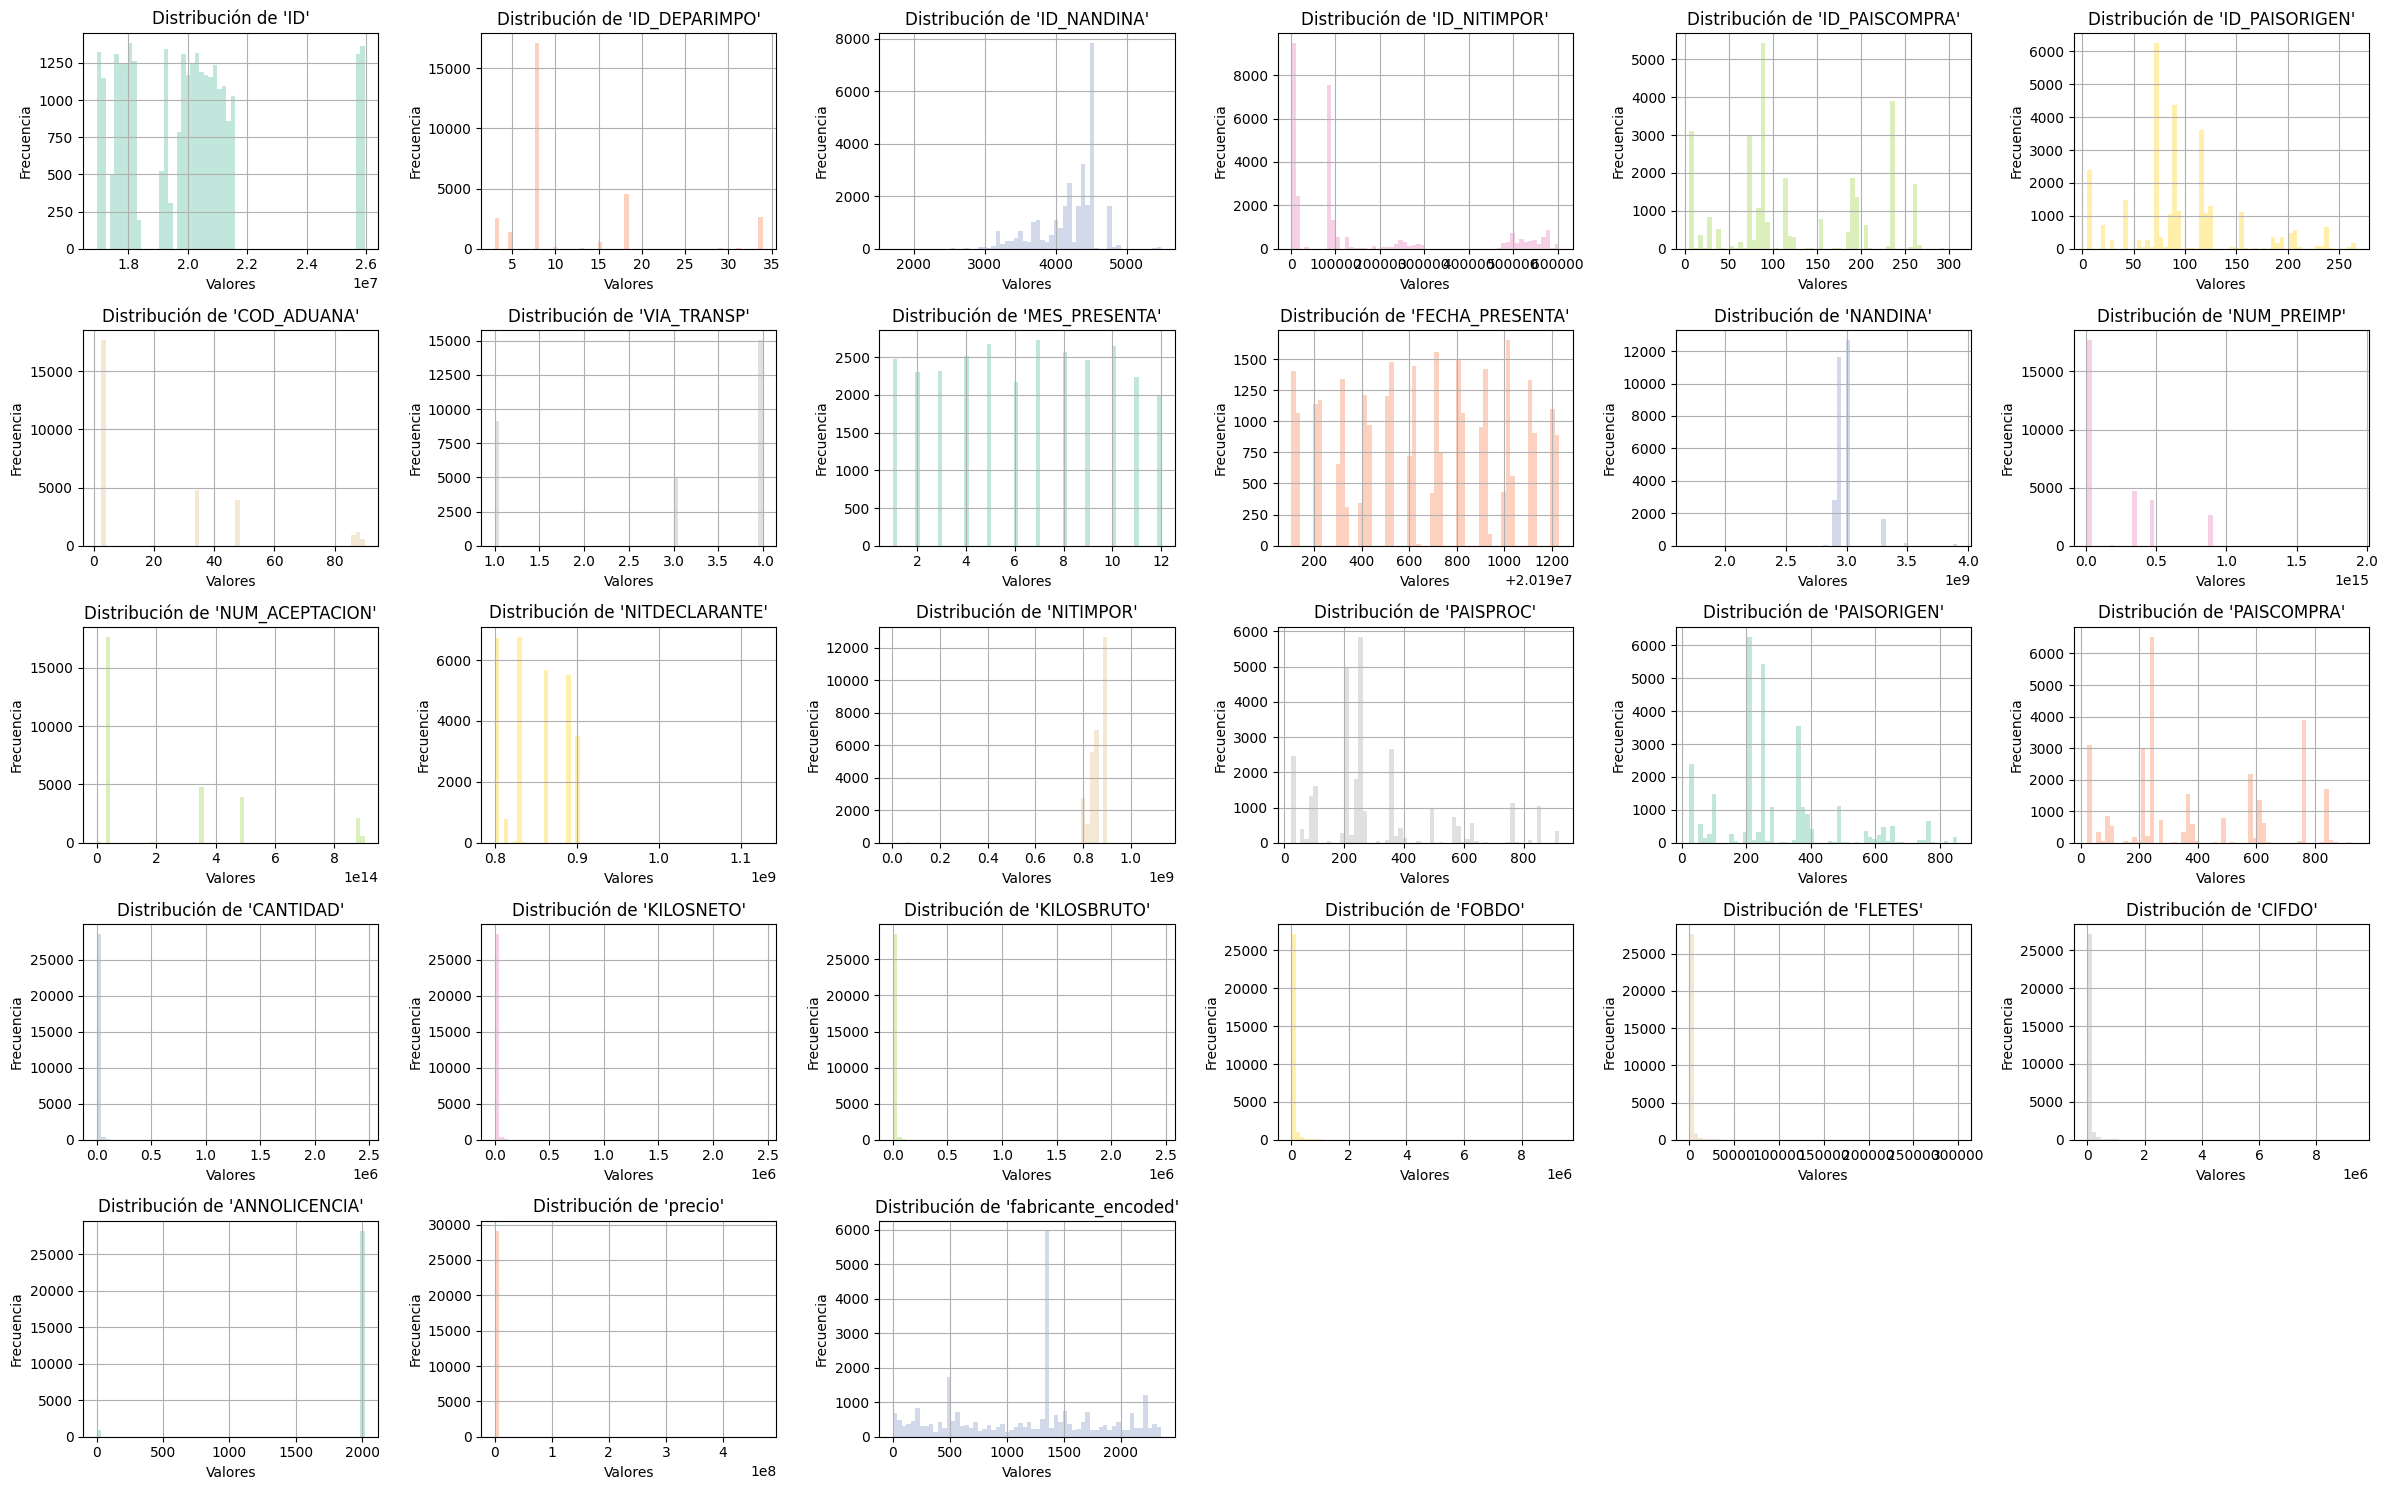

In [47]:
fig, axes = plt.subplots(nrows= n_rows,
                         ncols= n_cols,
                         figsize = (n_cols * 4, n_rows * 3)
                         )
axes = axes.flatten()
colors = sns.color_palette('Set2', n)
for i, col in enumerate(l_cols):
    df_sin_annio[col].hist(
        bins=60,
        ax=axes[i],
        color=colors[i],
        alpha=0.4
    )
    axes[i].set_title(f"Distribución de '{col}'")
    axes[i].set_xlabel("Valores")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Visualización de outliers

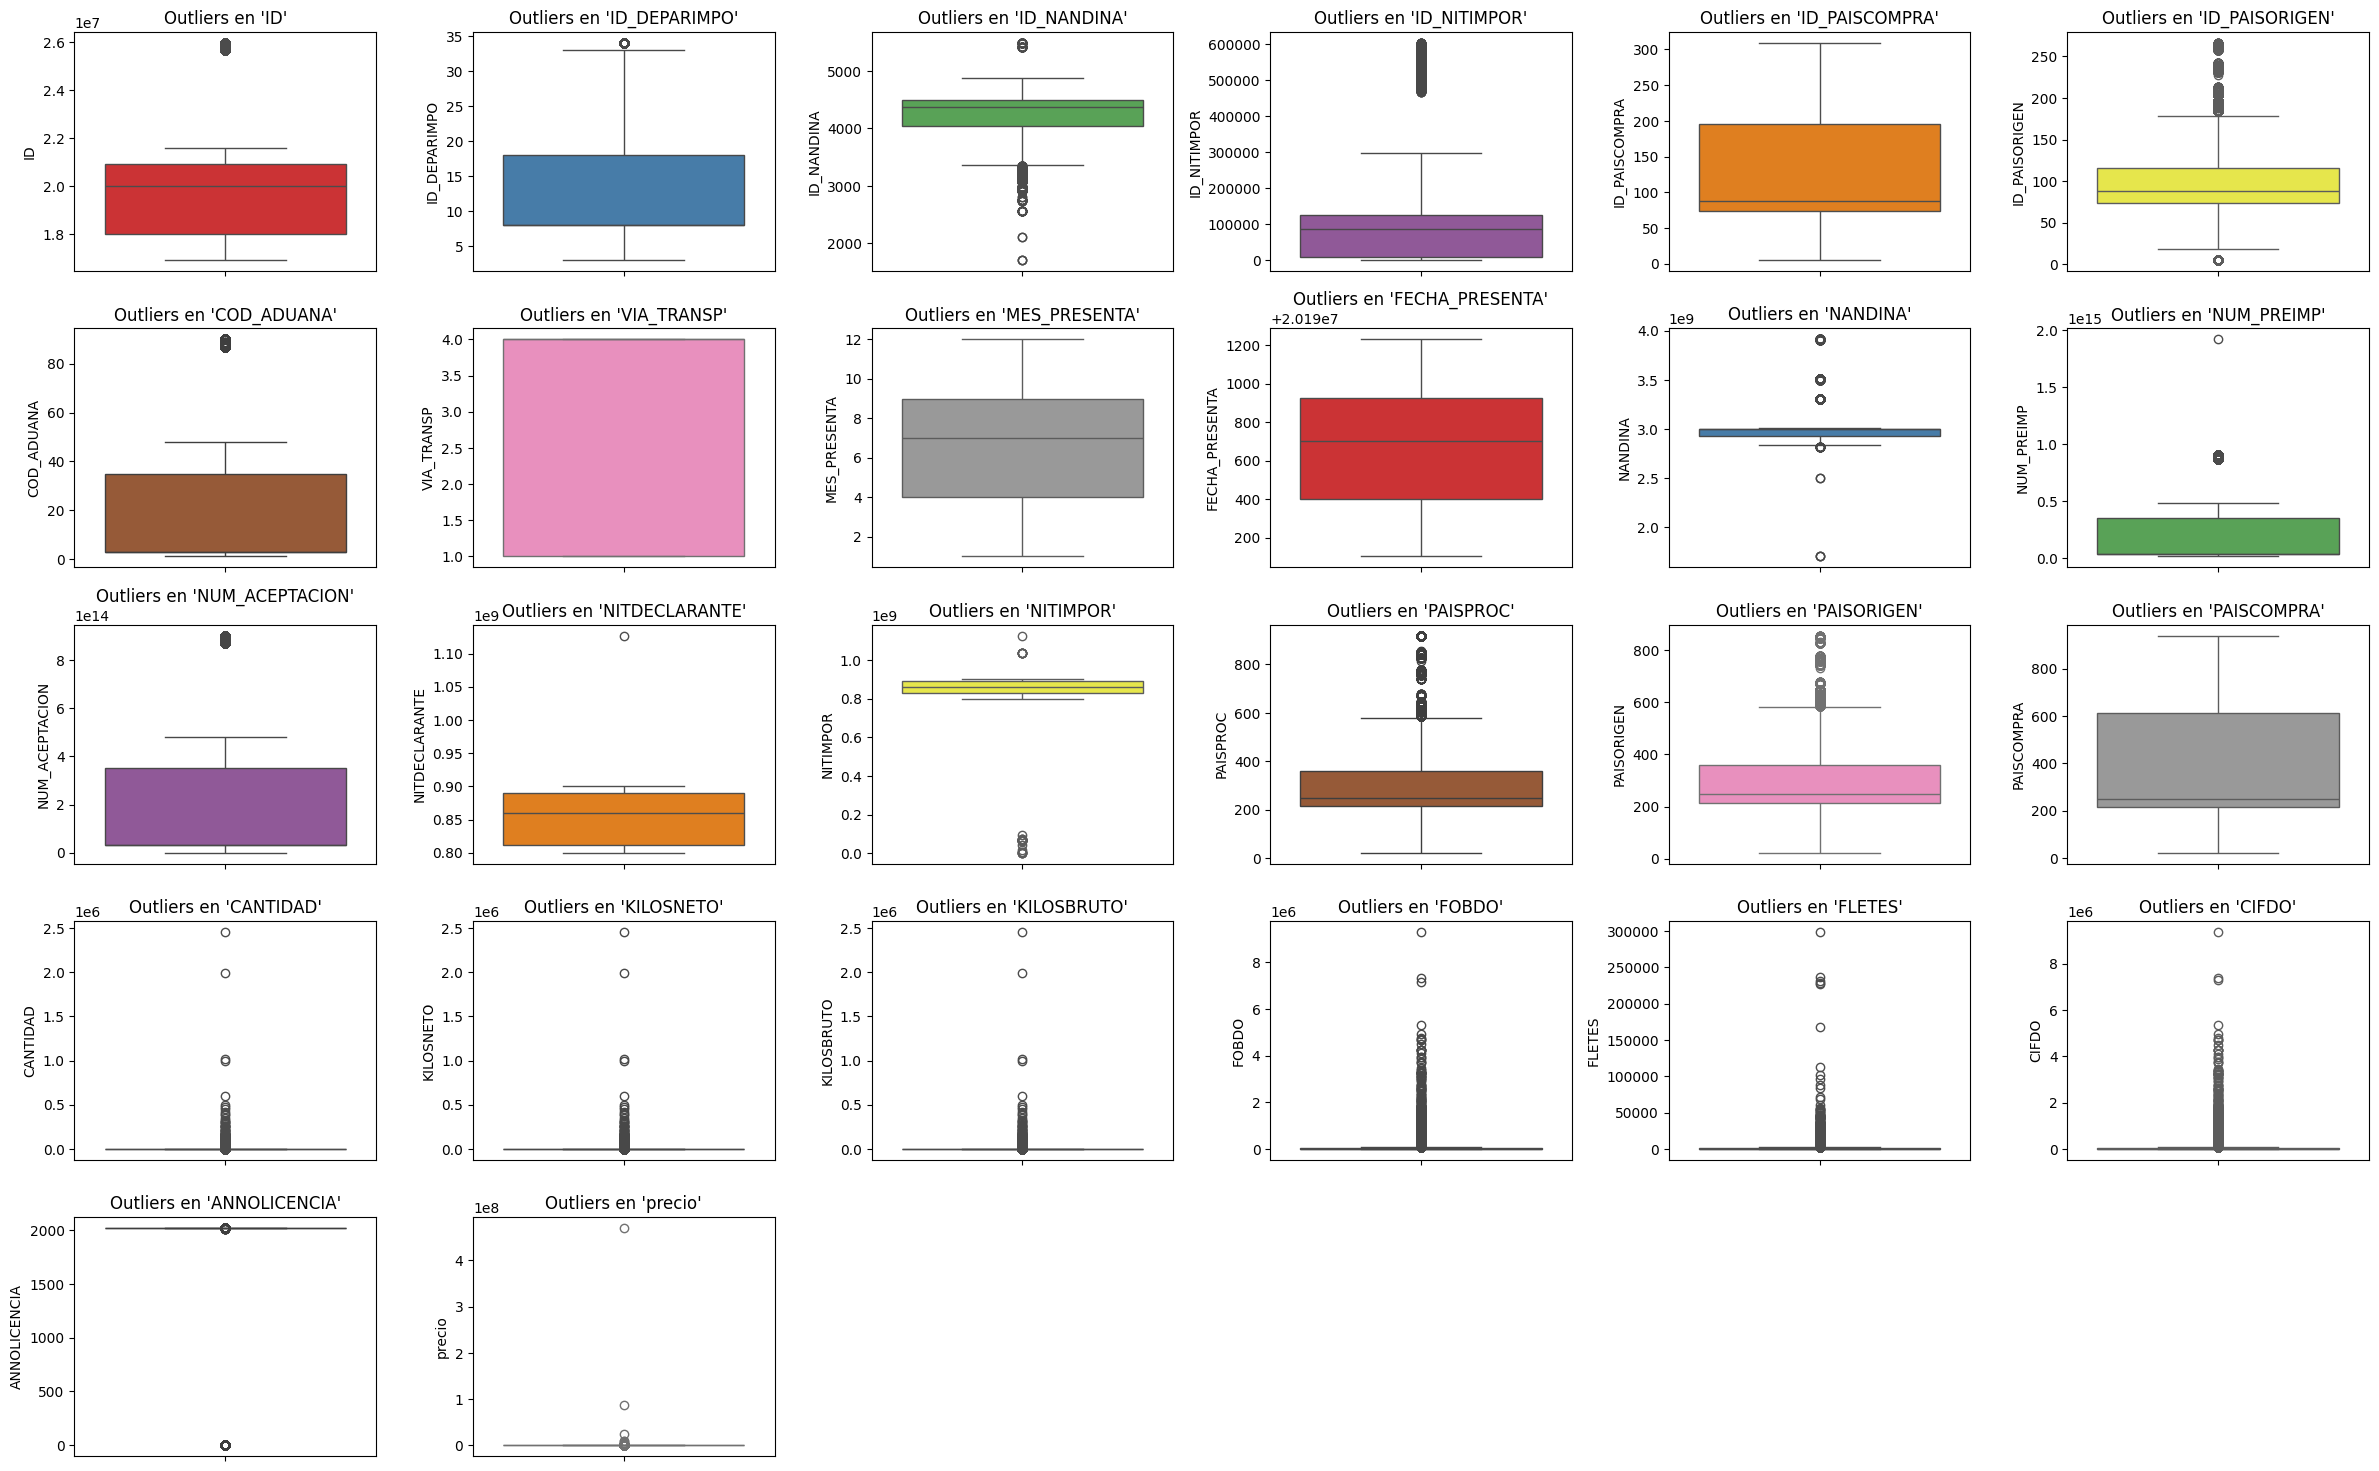

In [48]:
fig, axes = plt.subplots(nrows= n_rows,
                         ncols= n_cols,
                         figsize = (n_cols * 4, n_rows * 3)
                         )
axes = axes.flatten()
colors = sns.color_palette('Set1', n)
for i, col in enumerate(l_cols):
    sns.boxplot(
        y=df_sin_annio[col],
        ax=axes[i],
        color=colors[i]
    )
    axes[i].set_title(f"Outliers en '{col}'")

plt.tight_layout()
for j in range(i, len(axes)):
    fig.delaxes(axes[j])
plt.show()

Tratamiento de outliers

In [49]:
def outliers():
    bounds = []
    for col in l_cols:
        Q1 = df_sin_annio[col].quantile(0.25)
        Q3 = df_sin_annio[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        out_mask = (df_sin_annio[col] < lower_bound) | (df_sin_annio[col] > upper_bound)
        n_outliers = out_mask.sum()
        bounds.append((Q1, Q3, IQR, lower_bound, upper_bound, n_outliers))
    cols_bounds = ['Q1', 'Q3', 'IQR', 'lower_bound', 'upper_bound', 'n_outliers']
    df_bounds = pd.DataFrame(bounds, columns=cols_bounds)
    return df_bounds

pd.set_option('display.float_format', '{:.0f}'.format)
df_bounds = outliers()
df_bounds

,Q1,Q3,IQR,lower_bound,upper_bound,n_outliers
0,18032390,20915393,2883003,13707885,25239898,2676
1,8,18,10,-7,33,2629
2,4036,4493,457,3350,5178,1534
3,7937,126636,118699,-170112,304684,5029
4,74,196,122,-109,379,0
5,74,116,42,11,179,5462
6,3,35,32,-45,83,2665
7,1,4,3,-4,8,0
8,4,9,5,-4,16,0
9,20190402,20190925,523,20189618,20191710,0


Matriz de correlación

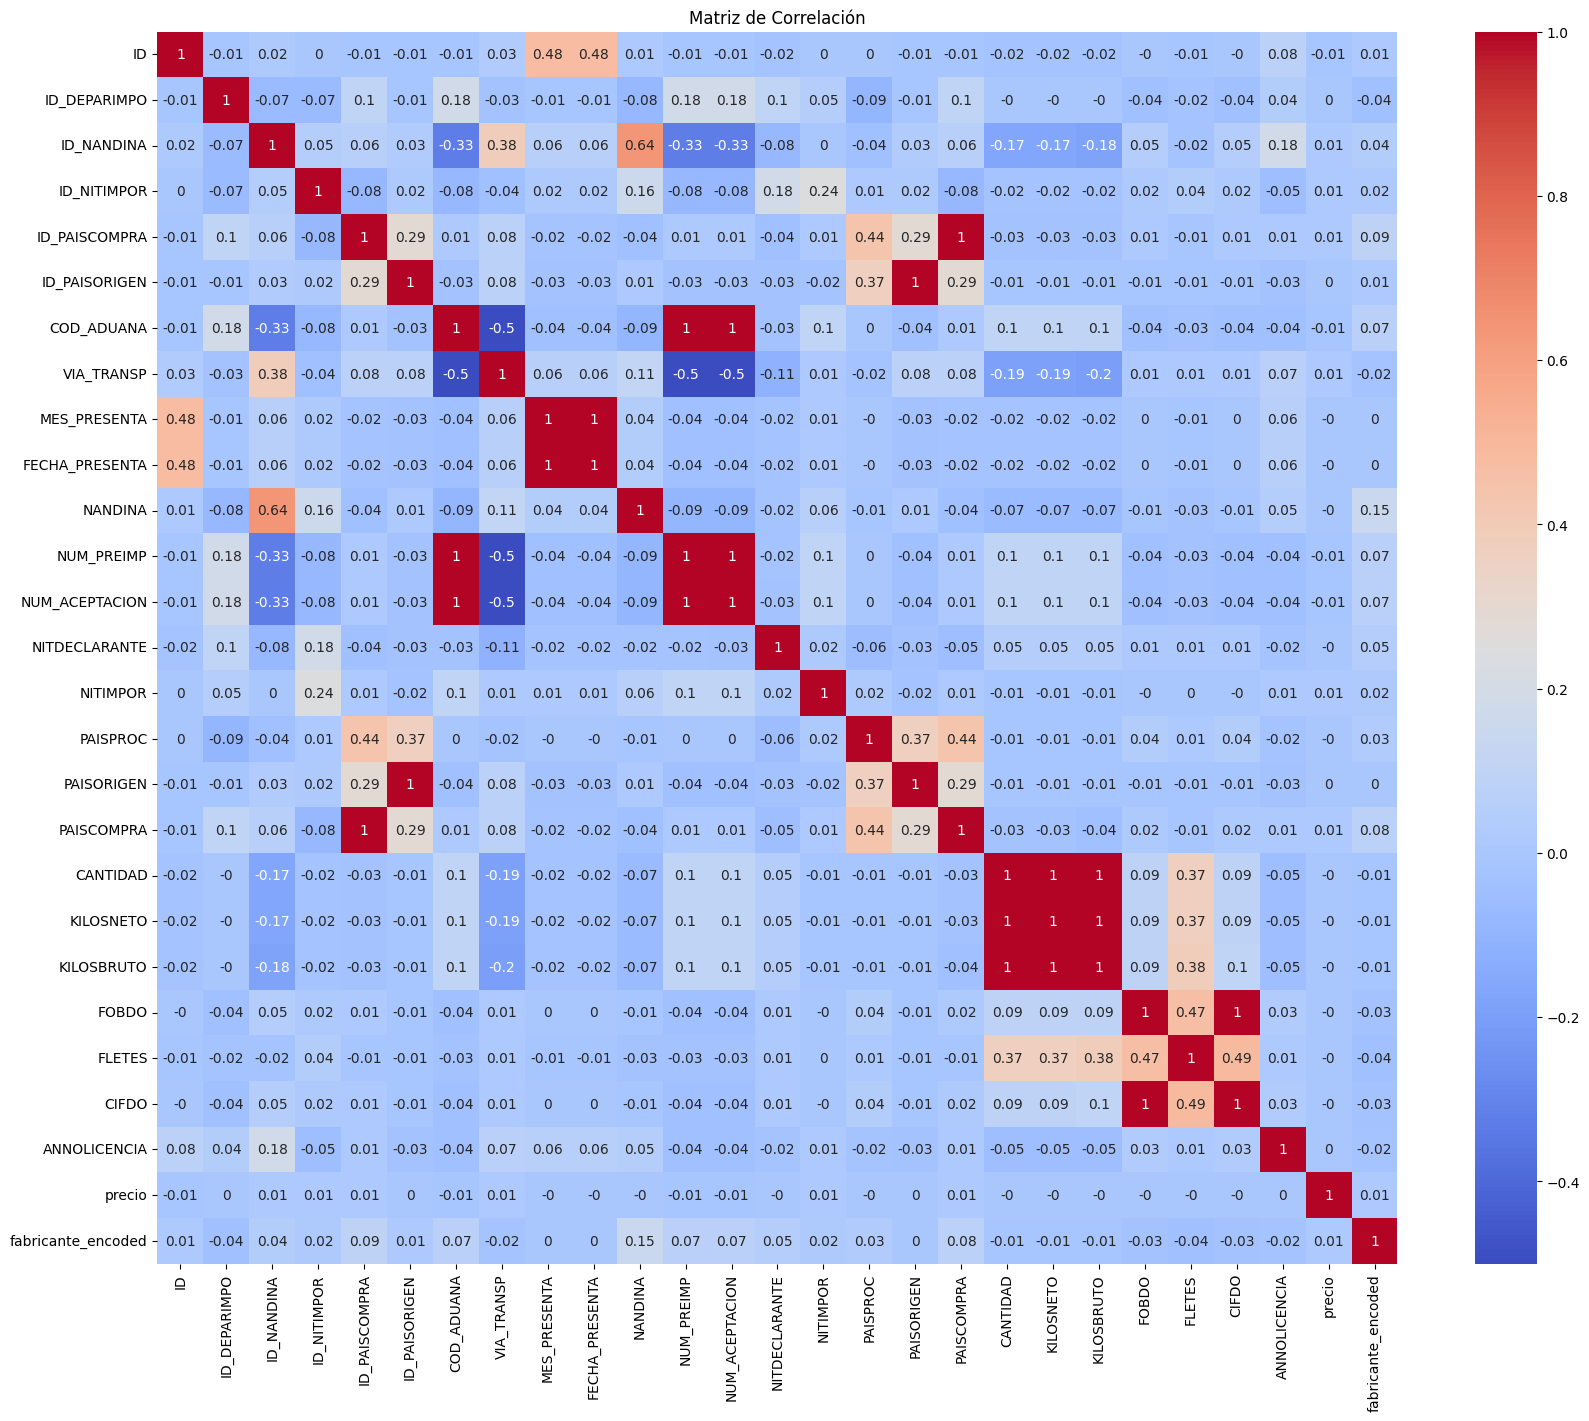

In [50]:
correlation_matrix = df_sin_annio[l_cols].corr().round(2)

fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm'
)
ax.set_title("Matriz de Correlación")
plt.show()